# Data Analysis for Data Scientists 
##### Written By: Alexis Clark, Claire Fraser, Artien Voskanian, Taylor Griggs, and Pete Kline 

In [1]:
# Dependencies and Setup
# import os
import csv
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import requests
import json

#Import Heatmap Library
import hvplot.pandas
import folium
from folium.plugins import HeatMap
import cartopy.crs as ccrs

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#Import the API key
from census import Census
from config import geoapify_key
from config import acct_id
from config import api_key


In [2]:
#Create a list of all 50 states

states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA",
          "ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD",
         "TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#Use this list to create a Dataframe with empty columns for Median Salary (State/National) as well as for 
#Estimated/Projected jobs

states_df = pd.DataFrame(states)
states_df[["Estimated Jobs","Projected Jobs","Median Salary (State)","Median Salary (National)","Median Salary (City)"]] = ""
states_df = states_df.rename(columns={0:"State"})
states_df.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,,,,,
1,AK,,,,,
2,AZ,,,,,
3,AR,,,,,
4,CA,,,,,
5,CO,,,,,
6,CT,,,,,
7,DE,,,,,
8,FL,,,,,
9,GA,,,,,


In [3]:
# Create variables to store the base_url for the career one stop API.
# Create varibales to store the paramaters of the API call and set params to equal these variables.
headers = {"Authorization": f"Bearer {api_key}"}
base_url = "https://api.careeronestop.org/v1/occupation" 
training ="false"
interest ="false"
videos = "false"
tasks = "false"
dwas ="false"
wages = "true"
alternateOnetTitles = "false"
projectedEmployment = "true"
ooh ="false"
stateLMILinks = "false"
relatedOnetTitles ="false"
skills ="false"
knowledge ="false"
ability = "false"
trainingPrograms ="false"
params = {"training":training,
         "interest":interest,
         "videos":videos,
         "tasks":tasks,
         "dwas":dwas,
         "wages":wages,
         "alternateOnetTitles":alternateOnetTitles,
         "projectedEmployment":projectedEmployment,
         "ooh":ooh,
         "stateLMILinks":stateLMILinks,
         "relatedOnetTitles":relatedOnetTitles,
         "skills":skills,
         "knowledge":knowledge,
         "ability":ability,
         "trainingPrograms":trainingPrograms}
counter = 1

In [4]:
# Create a for loop to iterate through the DataFrame, capturing the state of that row in a variable and using it for the 
# API call for that state. Capture the relevant info in the API call and store in into the DataFrame directly.

# Add an except clause to notify if there is missing or unavailable information for a State.

# Since the API's format is inconsistent (i.e. hourly and annual rates are found in different order/missing, 
#estimated/projected job information is sometimes missing), specific responses for wages and projections were stored in
# variables. List comprehensions were done on these variables not only to ensure the correct information is being found,
# but also return "N/A" in the DataFrame for missing information.

for index, row in states_df.iterrows():

    state = states_df.loc[index,"State"]
    api_url_2 = f"{base_url}/{acct_id}/Data%20Scientists/{state}?{params}"
    response_2= requests.get(api_url_2,headers=headers,params=params).json()
    result_wage = response_2["OccupationDetail"][0]["Wages"]["StateWagesList"]
    result_jobs = response_2["OccupationDetail"][0]["Projections"]["Projections"]

    try:
        states_df.loc[index,"Median Salary (National)"] = response_2["OccupationDetail"][0]["Wages"]["NationalWagesList"][0]["Median"]
    
        median_state_salary = [x['Median'] for x in result_wage if x['RateType']== 'Annual']
        states_df.loc[index,"Median Salary (State)"] = median_state_salary[0] if median_state_salary else "N/A"
                      
        estimated_jobs = [x['EstimatedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Estimated Jobs"] = estimated_jobs[0] if estimated_jobs else "N/A"
                
        projected_jobs = [x['ProjectedEmployment'] for x in result_jobs if x['StateName'] != "United States"]
        states_df.loc[index,"Projected Jobs"] = projected_jobs[0] if projected_jobs else "N/A"

        print(f"Retrieving Data for {state}: {counter}/50")
        counter = counter +1

    except: 
        print(f"Some information missing for {state}")
        counter = counter+1

states_df.head(10)

Retrieving Data for AL: 1/50
Retrieving Data for AK: 2/50
Retrieving Data for AZ: 3/50
Retrieving Data for AR: 4/50
Retrieving Data for CA: 5/50
Retrieving Data for CO: 6/50
Retrieving Data for CT: 7/50
Retrieving Data for DE: 8/50
Retrieving Data for FL: 9/50
Retrieving Data for GA: 10/50
Retrieving Data for HI: 11/50
Retrieving Data for ID: 12/50
Retrieving Data for IL: 13/50
Retrieving Data for IN: 14/50
Retrieving Data for IA: 15/50
Retrieving Data for KS: 16/50
Retrieving Data for KY: 17/50
Retrieving Data for LA: 18/50
Retrieving Data for ME: 19/50
Retrieving Data for MD: 20/50
Retrieving Data for MA: 21/50
Retrieving Data for MI: 22/50
Retrieving Data for MN: 23/50
Retrieving Data for MS: 24/50
Retrieving Data for MO: 25/50
Retrieving Data for MT: 26/50
Retrieving Data for NE: 27/50
Retrieving Data for NV: 28/50
Retrieving Data for NH: 29/50
Retrieving Data for NJ: 30/50
Retrieving Data for NM: 31/50
Retrieving Data for NY: 32/50
Retrieving Data for NC: 33/50
Retrieving Data for

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,220,280,85870,103500,
1,AK,90,90,100040,103500,
2,AZ,"1,440","2,170",102770,103500,
3,AR,N/A,N/A,N/A,103500,
4,CA,"18,400","26,700",126810,103500,
5,CO,740,900,103200,103500,
6,CT,860,"1,100",105700,103500,
7,DE,N/A,N/A,132300,103500,
8,FL,"2,550","3,900",100520,103500,
9,GA,"2,250","3,030",100400,103500,


In [5]:
# States with one or more missing data points is not helpful in answering the questions we have posed, and are therefore
# dropped. Dropped states include: AR,DE,MT,NM,ND,VT,WY

states_df.replace('N/A',np.nan, inplace=True)
states_df.dropna(inplace=True)
states_df.reset_index(inplace=True,drop=True,)
states_df.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
0,AL,220,280,85870,103500,
1,AK,90,90,100040,103500,
2,AZ,"1,440","2,170",102770,103500,
3,CA,"18,400","26,700",126810,103500,
4,CO,740,900,103200,103500,
5,CT,860,"1,100",105700,103500,
6,FL,"2,550","3,900",100520,103500,
7,GA,"2,250","3,030",100400,103500,
8,HI,50,60,112330,103500,
9,ID,0,0,96490,103500,


In [53]:
# Top 10 state Median Salaries in descending order
states_df["Median Salary (State)"] = states_df["Median Salary (State)"].astype('int64')

highest_pay_states = states_df.sort_values(by="Median Salary (State)",ascending=False)
highest_pay_states.reset_index(inplace=True,drop=True)
highest_pay_states.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National)
0,WA,"2,700","3,660",135850,103500
1,VA,"2,550","3,270",132400,103500
2,NJ,"1,820","2,360",129210,103500
3,CA,"18,400","26,700",126810,103500
4,NY,"3,500","4,990",124030,103500
5,NC,540,700,121970,103500
6,MD,"2,330","3,050",117730,103500
7,HI,50,60,112330,103500
8,RI,260,350,109240,103500
9,SD,60,80,108310,103500


In [7]:
# Top 10 state Current Estimated Jobs in descending order
states_df['Estimated Jobs'] = states_df['Estimated Jobs'].astype(str)
states_df['Estimated Jobs'] = states_df['Estimated Jobs'].str.replace(',','').astype(int)
estimated_jobs_states = states_df.sort_values(by='Estimated Jobs',ascending=False)
estimated_jobs_states.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
3,CA,18400,"26,700",126810,103500,
37,TX,4110,"6,150",99350,103500,
27,NY,3500,"4,990",124030,103500,
10,IL,3370,"4,340",103730,103500,
18,MA,2880,"4,340",106070,103500,
40,WA,2700,"3,660",135850,103500,
6,FL,2550,"3,900",100520,103500,
39,VA,2550,"3,270",132400,103500,
29,OH,2490,"3,150",88950,103500,
17,MD,2330,"3,050",117730,103500,


In [8]:
# Top 10 state Proejcted Jobs in descending order
states_df['Projected Jobs'] = states_df['Projected Jobs'].astype(str)
states_df['Projected Jobs'] = states_df['Projected Jobs'].str.replace(',','').astype(int)
projected_jobs_states = states_df.sort_values(by='Projected Jobs',ascending=False)
projected_jobs_states.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Median Salary (City)
3,CA,18400,26700,126810,103500,
37,TX,4110,6150,99350,103500,
27,NY,3500,4990,124030,103500,
10,IL,3370,4340,103730,103500,
18,MA,2880,4340,106070,103500,
6,FL,2550,3900,100520,103500,
40,WA,2700,3660,135850,103500,
39,VA,2550,3270,132400,103500,
29,OH,2490,3150,88950,103500,
38,UT,1880,3060,81250,103500,


In [9]:
# heatmap data 
# (keep an eye on state_df to see if there is an issue down line without the city column)
# Load the state data into a DataFrame
state_data_df = pd.read_csv("state_data_copy.csv")
state_data_df[['Latitude', 'Longitude']] = ""

# Display state data
state_data_df.head(10)

,State,Full State Name,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Latitude,Longitude
0,AL,Alabama,220,280,85870,103500,,
1,AK,Arkansas,90,90,100040,103500,,
2,AZ,Arizona,"1,440","2,170",102770,103500,,
3,CA,California,"18,400","26,700",126810,103500,,
4,CO,Colorado,740,900,103200,103500,,
5,CT,Connecticut,860,"1,100",105700,103500,,
6,FL,Florida,"2,550","3,900",100520,103500,,
7,GA,Georgia,"2,250","3,030",100400,103500,,
8,HI,Hawaii,50,60,112330,103500,,
9,ID,Idaho,0,0,96490,103500,,


In [10]:
# Create lists and loop to enter lat and lon info into dataframe
target_states = state_data_df["Full State Name"].unique()
target_states

# Info for State Dataframe
state_lat_lon = []
for state in target_states:
    # URL defined as State = & United States of America Change
    state_url = f"https://api.geoapify.com/v1/geocode/search?state={state}&format=json&apiKey={geoapify_key}&country=United%20States%20of%20America"

    response = requests.get(state_url).json()

    # Extract latitude and longitude
    lat = response["results"][0]["lat"]
    lon = response["results"][0]["lon"]

    # Print the latitude and longitude
    print('''
        State: {0}
        Latitude: {1}
        Longitude: {2}
        '''.format(state, lat, lon))
    state_lat_lon.append({
        "Full State Name": state,
        "Latitude": lat,
        "Longitude": lon
    })
    
state_lat_lon_df = pd.DataFrame(state_lat_lon)
state_lat_lon_df.head(10)


        State: Alabama
        Latitude: 33.2588817
        Longitude: -86.8295337
        

        State: Arkansas
        Latitude: 35.2048883
        Longitude: -92.4479108
        

        State: Arizona
        Latitude: 34.395342
        Longitude: -111.763275
        

        State: California
        Latitude: 36.7014631
        Longitude: -118.755997
        

        State: Colorado
        Latitude: 38.7251776
        Longitude: -105.607716
        

        State: Connecticut
        Latitude: 41.6500201
        Longitude: -72.7342163
        

        State: Florida
        Latitude: 28.5421109
        Longitude: -81.3790304
        

        State: Georgia
        Latitude: 32.3293809
        Longitude: -83.1137366
        

        State: Hawaii
        Latitude: 19.593801499999998
        Longitude: -155.42837009716908
        

        State: Idaho
        Latitude: 43.6447642
        Longitude: -114.015407
        

        State: Illinois
        Latitude: 40.079

,Full State Name,Latitude,Longitude
0,Alabama,33.258882,-86.829534
1,Arkansas,35.204888,-92.447911
2,Arizona,34.395342,-111.763275
3,California,36.701463,-118.755997
4,Colorado,38.725178,-105.607716
5,Connecticut,41.650020,-72.734216
6,Florida,28.542111,-81.379030
7,Georgia,32.329381,-83.113737
8,Hawaii,19.593801,-155.428370
9,Idaho,43.644764,-114.015407


In [11]:
state_data_df["Latitude"] = state_lat_lon_df["Latitude"]
state_data_df["Longitude"] = state_lat_lon_df["Longitude"]
state_data_df.head(10)

,State,Full State Name,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),Latitude,Longitude
0,AL,Alabama,220,280,85870,103500,33.258882,-86.829534
1,AK,Arkansas,90,90,100040,103500,35.204888,-92.447911
2,AZ,Arizona,"1,440","2,170",102770,103500,34.395342,-111.763275
3,CA,California,"18,400","26,700",126810,103500,36.701463,-118.755997
4,CO,Colorado,740,900,103200,103500,38.725178,-105.607716
5,CT,Connecticut,860,"1,100",105700,103500,41.650020,-72.734216
6,FL,Florida,"2,550","3,900",100520,103500,28.542111,-81.379030
7,GA,Georgia,"2,250","3,030",100400,103500,32.329381,-83.113737
8,HI,Hawaii,50,60,112330,103500,19.593801,-155.428370
9,ID,Idaho,0,0,96490,103500,43.644764,-114.015407


In [12]:
# DataFrame 'state_coordinates' containing latitude, longitude, and Population data

# Create a base map
heatmap_plot = folium.Map(location=[state_data_df['Latitude'].mean(), state_data_df['Longitude'].mean()], zoom_start=4)

# Create a list of heat points (latitude, longitude, weight/population)
heat_data = [[row['Latitude'], row['Longitude'], row['Median Salary (State)']] for _, row in state_data_df.iterrows()]

# Plot heatmap using Folium's HeatMap function
HeatMap(heat_data, radius=20).add_to(heatmap_plot)

# Save the map as an HTML file
output_file = "heatmap_with_colorbar.html"
heatmap_plot.save(output_file)

# Create a legend using HTML and CSS
legend_html = '''
<div style="position: fixed;
             bottom: 50px; left: 50px; width: 130px; height: 140px; 
             background-color: rgba(255, 255, 255, 0.7);
             z-index: 9999; font-size: 14px; border-radius: 5px;
             border: 1px solid grey; padding: 10px;">
    <strong>Color Legend</strong><br>
    <div style="background: linear-gradient(to right, red, yellow, green, blue, indigo); 
                width: 80px; height: 100%; transform: rotate(270deg);"></div>
    <div style="position: absolute; bottom: 10px; right: -40px;">High</div>
    <div style="position: absolute; top: 10px; right: -40px;">Low</div>
</div>
'''

# Add the legend to the map HTML file
with open(output_file, 'r') as f:
    map_html = f.read()

with open(output_file, 'w') as f:
    map_html = map_html.replace('</body>', legend_html + '</body>')
    f.write(map_html)
    
# Display the map in the notebook
from IPython.display import IFrame

IFrame(output_file, width='100%', height=900)

In [13]:
# Create list with top 10 states, and top 2 cities from each state 
#      NOTE: Hawaii, Rhode Island and South Dakota only have one top city

city_state = {
    'City': ["Seattle","Olympia","Arlington","Richmond","Trenton","Newark",
             "San Jose","San Francisco","New York City","Ithaca","Charlotte","Durham", 
             "Lexington Park","Baltimore","Honolulu","Providence","Sioux Falls"],
    'State': ["WA","WA","VA","VA","NJ","NJ","CA","CA","NY",
              "NY","NC","NC","MD","MD","HI","RI","SD"]}

dataframe_1 = pd.DataFrame(city_state)
dataframe_1[['Estimated Analysts - State', 'Median Salary - City']] = ""

# dataframe_1

In [14]:
city_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/"
params_city = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false"
headers_city = {"Authorization": f"Bearer {api_key}"}

In [15]:
for index, row in dataframe_1.iterrows():
    # Get the city and state
    city = dataframe_1.loc[index, "City"]
    state = dataframe_1.loc[index, "State"]
    # Add the current City type to the parameters
    api_city_url =  f"{city_url}{city}%2C%20{state}{params_city}"
    
    response_1 = requests.get(api_city_url, headers = headers_city).json()
    results = response_1['OccupationDetail'][0]['Wages']['BLSAreaWagesList']
    try:
        projected_jobs = response_1["OccupationDetail"][0]['Projections']['Projections'][0]['EstimatedEmployment']
        dataframe_1.loc[index, 'Estimated Analysts - State'] = projected_jobs
        
        median_salary = [x['Median'] for x in results if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - City'] = median_salary    

    except (KeyError, IndexError):
        dataframe_1.loc[index, 'Median Salary - City'] = "Didnt find anything"
        dataframe_1.loc[index, 'Estimated Analysts - State'] = "Didnt find anything"
dataframe_1

,City,State,Estimated Analysts - State,Median Salary - City
0,Seattle,WA,"2,700",140560
1,Olympia,WA,"2,700",137750
2,Arlington,VA,"2,550",124570
3,Richmond,VA,"2,550",120000
4,Trenton,NJ,"1,820",131660
5,Newark,NJ,"1,820",130070
6,San Jose,CA,"18,400",172110
7,San Francisco,CA,"18,400",137680
8,New York City,NY,"3,500",130070
9,Ithaca,NY,"3,500",110760


In [16]:
#Linear regression (scatter-plot) - State population (census csv), 
# data analysts, per state, projected growth per state
all_state_pop = pd.read_csv('census_state_pop_20to22.csv', index_col='NAME')

all_state_pop.head(10)

,SUMLEV,REGION,DIVISION,STATE,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,NPOPCHG_2021,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
NAME,,,,,,,,,,,,,,,,,,,,,
United States,10,0,0,0,331449520,331511512,332031554,333287557,61992,520042,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
Northeast Region,20,1,0,0,57609156,57448898,57259257,57040406,-160258,-189641,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
New England,30,1,1,0,15116206,15074473,15121745,15129548,-41733,47272,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
Middle Atlantic,30,1,2,0,42492950,42374425,42137512,41910858,-118525,-236913,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
Midwest Region,20,2,0,0,68985537,68961043,68836505,68787595,-24494,-124538,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
East North Central,30,2,3,0,47368637,47338744,47181948,47097779,-29893,-156796,...,11.204806,11.368786,-0.621578,-0.591707,0.783215,2.081402,-3.716477,-3.105991,-2.933262,-1.024589
West North Central,30,2,4,0,21616900,21622299,21654557,21689816,5399,32258,...,10.741168,10.734911,0.698341,0.888466,0.845302,2.175646,-0.305983,-1.275044,0.539318,0.900601
South Region,20,3,0,0,126266262,126450613,127346029,128716192,184351,895416,...,11.063685,10.983252,0.173186,0.547508,1.223200,3.239369,5.696892,6.779095,6.920092,10.018463
South Atlantic,30,3,5,0,66089861,66164801,66666348,67452940,74940,501547,...,10.950398,11.011869,-0.417252,-0.162303,1.471567,3.880546,6.583049,7.809272,8.054617,11.689818


In [17]:
pop22 = all_state_pop[['POPESTIMATE2022']]
#pop22
state_pop22_part1 = pop22[14:22]
state_pop22_part2 = pop22[23:65]

state_pop_clean = pd.concat([state_pop22_part1, state_pop22_part2], axis=0, ignore_index=False)

#return a line indicating the number of states included
print(f'There are {len(state_pop_clean)} states in this dataset.\n')

#Convert state names to abbreviations
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#create new column to hold state abbreviations
state_pop_clean['State'] = ''
index = state_pop_clean.index
for index, row in state_pop_clean.iterrows():
    state_name = index
    state_abb = state_dict.get(state_name, 'Not Found')
    state_pop_clean.loc[index, 'State'] = state_abb

print(state_pop_clean)

There are 50 states in this dataset.

                POPESTIMATE2022 State
NAME                                 
Alabama                 5074296    AL
Alaska                   733583    AK
Arizona                 7359197    AZ
Arkansas                3045637    AR
California             39029342    CA
Colorado                5839926    CO
Connecticut             3626205    CT
Delaware                1018396    DE
Florida                22244823    FL
Georgia                10912876    GA
Hawaii                  1440196    HI
Idaho                   1939033    ID
Illinois               12582032    IL
Indiana                 6833037    IN
Iowa                    3200517    IA
Kansas                  2937150    KS
Kentucky                4512310    KY
Louisiana               4590241    LA
Maine                   1385340    ME
Maryland                6164660    MD
Massachusetts           6981974    MA
Michigan               10034113    MI
Minnesota               5717184    MN
Mississippi 

In [35]:
#Merge poopulation estimates with analyst count and salary dataframe
analysts_with_pop = pd.merge(dataframe_1, state_pop_clean, how='left', on='State')
analysts_with_pop = analysts_with_pop.rename(columns={'POPESTIMATE2022':'2022 Population Estimates'})
# print(analysts_with_pop.dtypes)
analysts_with_pop

,City,State,Estimated Analysts - State,Median Salary - City,Median Salary - State,Median Salary - National,2022 Population Estimates
0,Seattle,WA,"2,700",140560,135850,103500,7785786
1,Olympia,WA,"2,700",137750,135850,103500,7785786
2,Arlington,VA,"2,550",124570,132400,103500,8683619
3,Richmond,VA,"2,550",120000,132400,103500,8683619
4,Trenton,NJ,"1,820",131660,129210,103500,9261699
5,Newark,NJ,"1,820",130070,129210,103500,9261699
6,San Jose,CA,"18,400",172110,126810,103500,39029342
7,San Francisco,CA,"18,400",137680,126810,103500,39029342
8,New York City,NY,"3,500",130070,124030,103500,19677151
9,Ithaca,NY,"3,500",110760,124030,103500,19677151


In [36]:
#Need to add state population estimate data from census df to Artien's df
#re-visualize the census df
#print(state_pop_clean)
states_df = pd.read_csv('state_data.csv')
states_with_pop = pd.merge(states_df, state_pop_clean, how='left', on='State')
states_with_pop = states_with_pop.rename(columns={'POPESTIMATE2022':'2022 Population Estimates'})
print(states_with_pop.dtypes)
states_with_pop
states_with_pop['Estimated Jobs'] = states_with_pop['Estimated Jobs'].str.replace(',', '')
states_with_pop['Estimated Jobs'] = states_with_pop['Estimated Jobs'].astype('int64')
states_with_pop['Projected Jobs'] = states_with_pop['Projected Jobs'].str.replace(',', '')
states_with_pop['Projected Jobs'] = states_with_pop['Projected Jobs'].astype('int64')
states_with_pop['Median Salary (State)'] = states_with_pop['Median Salary (State)'].astype('int64')
#states_with_pop['Estimated Jobs'] = analysts_with_pop['Estimated Jobs'].str.replace(',', '').astype(int)
print(states_with_pop.dtypes)
print(states_with_pop)

State                        object
Estimated Jobs               object
Projected Jobs               object
Median Salary (State)         int64
Median Salary (National)      int64
2022 Population Estimates     int64
dtype: object
State                        object
Estimated Jobs                int64
Projected Jobs                int64
Median Salary (State)         int64
Median Salary (National)      int64
2022 Population Estimates     int64
dtype: object
   State  Estimated Jobs  Projected Jobs  Median Salary (State)  \
0     AL             220             280                  85870   
1     AK              90              90                 100040   
2     AZ            1440            2170                 102770   
3     CA           18400           26700                 126810   
4     CO             740             900                 103200   
5     CT             860            1100                 105700   
6     FL            2550            3900                 100520   
7   

In [37]:
#Calculate the number of jobs in each state per capita
#states_with_pop['Estimated Jobs'] / states_with_pop['2022 Population Estimates']
states_with_pop['Jobs per Capita'] = ''
states_with_pop['Jobs per Capita (E-5)'] = ''
states_with_pop
for index, row in states_with_pop.iterrows():
    #get the number of estimated jobs and population
    estimated_jobs = row['Estimated Jobs']
    population = row['2022 Population Estimates']
    
    #calculate the number of jobs per capita
    jobs_per_capita = estimated_jobs / population
    
    #add to appropriate column
    states_with_pop.loc[index, 'Jobs per Capita'] = jobs_per_capita
    
    #convert the number of jobs per capita by multiplying by 100000
    adj_jobs_per_capita = jobs_per_capita * 100000
    states_with_pop.loc[index, 'Jobs per Capita (E-5)'] = adj_jobs_per_capita
    

states_with_pop.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),2022 Population Estimates,Jobs per Capita,Jobs per Capita (E-5)
0,AL,220,280,85870,103500,5074296,0.000043,4.335577
1,AK,90,90,100040,103500,733583,0.000123,12.26855
2,AZ,1440,2170,102770,103500,7359197,0.000196,19.567352
3,CA,18400,26700,126810,103500,39029342,0.000471,47.144018
4,CO,740,900,103200,103500,5839926,0.000127,12.671393
5,CT,860,1100,105700,103500,3626205,0.000237,23.716254
6,FL,2550,3900,100520,103500,22244823,0.000115,11.463341
7,GA,2250,3030,100400,103500,10912876,0.000206,20.617846
8,HI,50,60,112330,103500,1440196,0.000035,3.47175
9,ID,0,0,96490,103500,1939033,0.0,0.0


In [38]:
states_with_pop.dtypes

State                        object
Estimated Jobs                int64
Projected Jobs                int64
Median Salary (State)         int64
Median Salary (National)      int64
2022 Population Estimates     int64
Jobs per Capita              object
Jobs per Capita (E-5)        object
dtype: object

In [39]:
states_with_pop['Jobs per Capita (E-5)'] = pd.to_numeric(states_with_pop['Jobs per Capita (E-5)'], errors='coerce')
states_with_pop['Median Salary (State)'] = pd.to_numeric(states_with_pop['Median Salary (State)'], errors='coerce')
states_with_pop.dtypes

State                         object
Estimated Jobs                 int64
Projected Jobs                 int64
Median Salary (State)          int64
Median Salary (National)       int64
2022 Population Estimates      int64
Jobs per Capita               object
Jobs per Capita (E-5)        float64
dtype: object

In [40]:
#Write functions to store the equation, y-values for regression line, and r value
def lin_regress_eq(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return line_eq
def lin_regress_values(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values
def lin_regress_r(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return rvalue

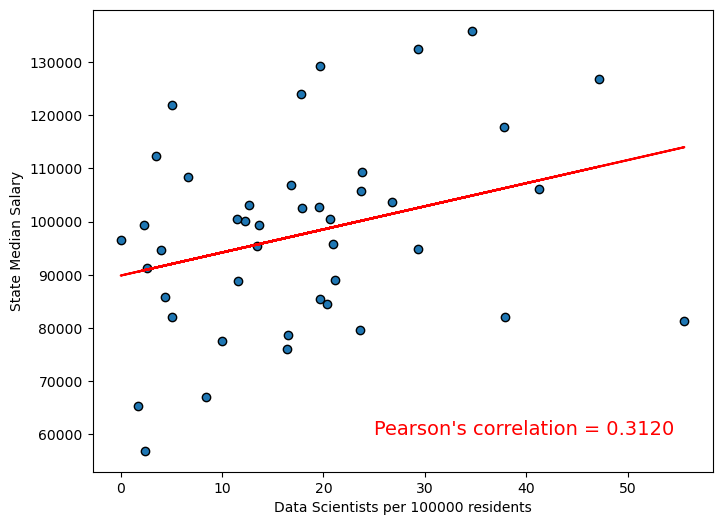

In [41]:
#Plot the jobs per capita (E-5) vs Median Salary (State) on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(states_with_pop['Jobs per Capita (E-5)'], states_with_pop['Median Salary (State)'],
            marker = 'o', edgecolors='black')
plt.xlabel('Data Scientists per 100000 residents') 
plt.ylabel('State Median Salary')
y_values = lin_regress_values(states_with_pop['Jobs per Capita (E-5)'], states_with_pop['Median Salary (State)'])
plt.plot(states_with_pop['Jobs per Capita (E-5)'], y_values, color='red')
pearson_corr = states_with_pop['Jobs per Capita (E-5)'].corr(states_with_pop['Median Salary (State)'])
print_pearson = f"Pearson's correlation = {pearson_corr:.4f}"
#r_squared = (lin_regress_r(states_with_pop['Jobs per Capita (E-5)'].astype(float), states_with_pop['Median Salary (State)'].astype(float)) ) ** 2
#print_rsq = f'R-squared: {r_squared:.4f}'
plt.text(25, 60000, print_pearson, color='red', fontsize=14)
#uncomment the following line to save the plot as a png
plt.savefig('scatter_JobsPerCapita_MedianSalary.png')
plt.show() 

In [42]:
#calculate the growth rate for each state using the projected and estimated jobs
states_with_pop["Growth Rate (%)"] = ''
states_with_pop["Growth Rate (%)"] = round((states_with_pop["Projected Jobs"]-states_with_pop["Estimated Jobs"])
                                           /states_with_pop["Estimated Jobs"]*100,2)

In [43]:
states_with_pop.head(10)

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),2022 Population Estimates,Jobs per Capita,Jobs per Capita (E-5),Growth Rate (%)
0,AL,220,280,85870,103500,5074296,0.000043,4.335577,27.27
1,AK,90,90,100040,103500,733583,0.000123,12.268550,0.00
2,AZ,1440,2170,102770,103500,7359197,0.000196,19.567352,50.69
3,CA,18400,26700,126810,103500,39029342,0.000471,47.144018,45.11
4,CO,740,900,103200,103500,5839926,0.000127,12.671393,21.62
5,CT,860,1100,105700,103500,3626205,0.000237,23.716254,27.91
6,FL,2550,3900,100520,103500,22244823,0.000115,11.463341,52.94
7,GA,2250,3030,100400,103500,10912876,0.000206,20.617846,34.67
8,HI,50,60,112330,103500,1440196,0.000035,3.471750,20.00
9,ID,0,0,96490,103500,1939033,0.0,0.000000,NaN


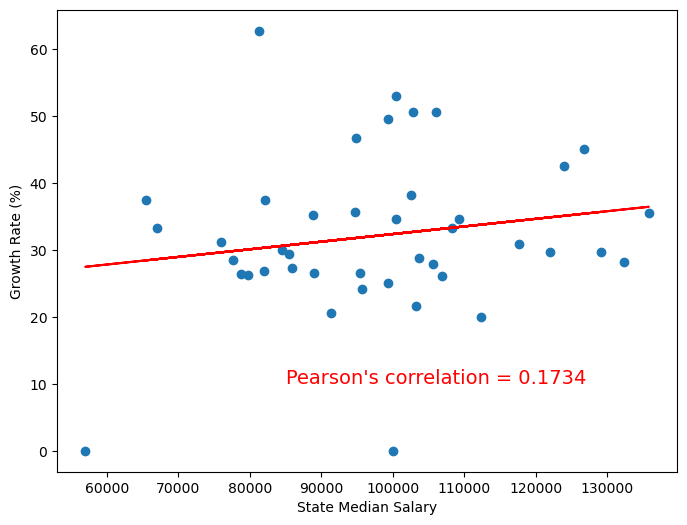

In [44]:
#include the growth rate percentages and make a scatter plot
plt.figure(figsize=(8, 6))
states_with_pop = states_with_pop.dropna()

plt.scatter(states_with_pop["Median Salary (State)"],states_with_pop["Growth Rate (%)"])
plt.ylabel('Growth Rate (%)') 
plt.xlabel('State Median Salary')
pearson_corr = states_with_pop['Median Salary (State)'].corr(states_with_pop['Growth Rate (%)'])
slope, intercept, r_value,p_value, std_err = linregress(states_with_pop["Median Salary (State)"], states_with_pop["Growth Rate (%)"])
plt.plot(states_with_pop['Median Salary (State)'], intercept + slope * states_with_pop['Median Salary (State)'],'r', label='Linear Regression')
print_pearson = f"Pearson's correlation = {pearson_corr:.4f}"
plt.text(85000, 10, print_pearson, color='red', fontsize=14)
#uncomment the following line to save the plot as a png
plt.savefig('scatter_MedianSalary_GrowthRate.png')
plt.show()

In [45]:
dataframe_1[['Median Salary - State', "Median Salary - National"]] = ""
dataframe_1

,City,State,Estimated Analysts - State,Median Salary - City,Median Salary - State,Median Salary - National
0,Seattle,WA,"2,700",140560,,
1,Olympia,WA,"2,700",137750,,
2,Arlington,VA,"2,550",124570,,
3,Richmond,VA,"2,550",120000,,
4,Trenton,NJ,"1,820",131660,,
5,Newark,NJ,"1,820",130070,,
6,San Jose,CA,"18,400",172110,,
7,San Francisco,CA,"18,400",137680,,
8,New York City,NY,"3,500",130070,,
9,Ithaca,NY,"3,500",110760,,


In [29]:
# city_url = f"https://api.careeronestop.org/v1/occupation/{acct_id}/Data%20Scientists/"
# params_city = "?training=false&interest=true&videos=false&tasks=false&dwas=false&wages=true&alternateOnetTitles=false&projectedEmployment=true&ooh=false&stateLMILinks=false&relatedOnetTitles=false&skills=false&knowledge=false&ability=false&trainingPrograms=false"
# headers_city = {"Authorization": f"Bearer {api_key}"}

In [46]:
for index, row in dataframe_1.iterrows():
    # Get the city and state
    city = dataframe_1.loc[index, "City"]
    state = dataframe_1.loc[index, "State"]
    # Add the current City type to the parameters
    api_city_url =  f"{city_url}{city}%2C%20{state}{params_city}"
    
    response_1 = requests.get(api_city_url, headers = headers_city).json()
    results = response_1['OccupationDetail'][0]['Wages']['BLSAreaWagesList']
    results_state = response_1['OccupationDetail'][0]['Wages']['StateWagesList']
    results_national = response_1["OccupationDetail"][0]["Wages"]["NationalWagesList"]
    
    try:
        #Median Salary for State
        median_salary_state = [x['Median'] for x in results_state if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - State'] = median_salary_state 
        
        #Median Salart National add
        median_salary_national = [x['Median'] for x in results_national if x['RateType']=='Annual' ][0] 
        dataframe_1.loc[index, 'Median Salary - National'] = median_salary_national
        
    except (KeyError, IndexError):
        dataframe_1.loc[index, 'Median Salaty - State'] = "Didnt find anything"
        dataframe_1.loc[index, 'Median Salary - National'] = "Didnt find anything"
        

dataframe_1

,City,State,Estimated Analysts - State,Median Salary - City,Median Salary - State,Median Salary - National
0,Seattle,WA,"2,700",140560,135850,103500
1,Olympia,WA,"2,700",137750,135850,103500
2,Arlington,VA,"2,550",124570,132400,103500
3,Richmond,VA,"2,550",120000,132400,103500
4,Trenton,NJ,"1,820",131660,129210,103500
5,Newark,NJ,"1,820",130070,129210,103500
6,San Jose,CA,"18,400",172110,126810,103500
7,San Francisco,CA,"18,400",137680,126810,103500
8,New York City,NY,"3,500",130070,124030,103500
9,Ithaca,NY,"3,500",110760,124030,103500


In [47]:
#Formatting into Dollars and Alhpabetize
formatted_df = dataframe_1.copy()
formatted_df = formatted_df.sort_values(by='City', ascending=True)
formatted_df['Median Salary - City'] = formatted_df['Median Salary - City'].astype(int)
formatted_df['Median Salary - State'] = formatted_df['Median Salary - State'].astype(int)
formatted_df['Median Salary - National'] = formatted_df['Median Salary - National'].astype(int)

#formatted_df['Median Salary - State'] = formatted_df['Median Salary - State'].map('${:,.2f}'.format)
#formatted_df.reset_index (drop=True)
highest_df = formatted_df.sort_values('Median Salary - State', ascending=False)
highest_df

,City,State,Estimated Analysts - State,Median Salary - City,Median Salary - State,Median Salary - National
1,Olympia,WA,"2,700",137750,135850,103500
0,Seattle,WA,"2,700",140560,135850,103500
2,Arlington,VA,"2,550",124570,132400,103500
3,Richmond,VA,"2,550",120000,132400,103500
5,Newark,NJ,"1,820",130070,129210,103500
4,Trenton,NJ,"1,820",131660,129210,103500
7,San Francisco,CA,"18,400",137680,126810,103500
6,San Jose,CA,"18,400",172110,126810,103500
9,Ithaca,NY,"3,500",110760,124030,103500
8,New York City,NY,"3,500",130070,124030,103500


In [58]:
bar_plot_plot = pd.DataFrame(states_with_pop.sort_values(by="Median Salary (State)", ascending = False ))
top_bar_plot = bar_plot_plot.head(10)
top_bar_plot

,State,Estimated Jobs,Projected Jobs,Median Salary (State),Median Salary (National),2022 Population Estimates,Jobs per Capita,Jobs per Capita (E-5),Growth Rate (%)
40,WA,2700,3660,135850,103500,7785786,0.000347,34.678580,35.56
39,VA,2550,3270,132400,103500,8683619,0.000294,29.365637,28.24
26,NJ,1820,2360,129210,103500,9261699,0.000197,19.650822,29.67
3,CA,18400,26700,126810,103500,39029342,0.000471,47.144018,45.11
27,NY,3500,4990,124030,103500,19677151,0.000178,17.787128,42.57
28,NC,540,700,121970,103500,10698973,0.00005,5.047213,29.63
17,MD,2330,3050,117730,103500,6164660,0.000378,37.796083,30.90
8,HI,50,60,112330,103500,1440196,0.000035,3.471750,20.00
33,RI,260,350,109240,103500,1093734,0.000238,23.771776,34.62
35,SD,60,80,108310,103500,909824,0.000066,6.594682,33.33


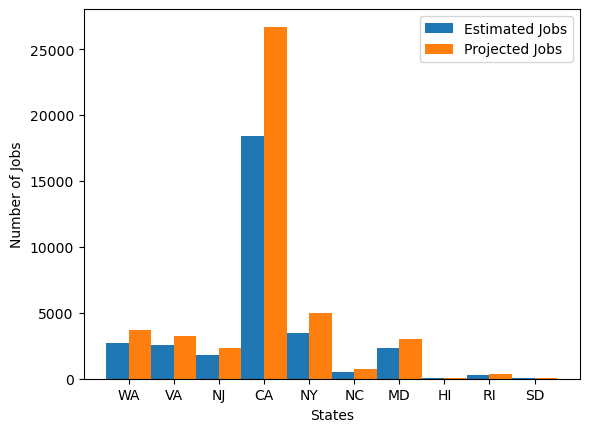

In [59]:
x_axis =np.arange(len(top_bar_plot["State"]))
y_axis = top_bar_plot["Estimated Jobs"]
y2 = top_bar_plot["Projected Jobs"]
bar_width= 0.5

plt.bar(x_axis,y_axis,width=bar_width,label="Estimated Jobs")
plt.bar(x_axis+bar_width,y2, width=bar_width,label="Projected Jobs")
plt.xticks([x + 0.25 for x in x_axis], top_bar_plot["State"])


plt.ylabel("Number of Jobs")
plt.xlabel("States")
plt.legend()
plt.show()

In [ ]:
# Create bar graph to showcase City vs State data
x_value = formatted_df["City"]
y_value1 = formatted_df["Median Salary - City"]
y_value2 = formatted_df["Median Salary - State"]

bar_width = 0.35
# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.bar(bar_positions1, y_value1, width=0.35, label='Median Salary - City', color='b')
plt.bar(bar_positions2, y_value2, width=0.35, label='Median Salary - State', color='r')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Median Salary')
plt.title('City vs State Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value, rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig('graphs/CvSMedian.jpg')

In [ ]:
x_value = formatted_df["City"]
y_value1 = formatted_df["Median Salary - City"]
y_value2 = formatted_df["Median Salary - National"]

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.bar(bar_positions1, y_value1, width=0.35, label='Median Salary - City', color='b')
plt.bar(bar_positions2, y_value2, width=0.35, label='Median Salary - National', color='y')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Median Salary')
plt.title('City Vs National Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value, rotation=90)
plt.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig('graphs/CvNMed.jpg')

In [ ]:
group_df = formatted_df.drop_duplicates(subset='State', keep='first')
group_df

In [ ]:
x_value = group_df["State"]
y_value1 = group_df["Median Salary - State"]
y_value2 = group_df["Median Salary - National"]
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(x_value))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting the bars
plt.figure(figsize=(20,6))
plt.bar(bar_positions1, y_value1, width=0.30, label='Median Salary - State', color='r')
plt.bar(bar_positions2, y_value2, width=0.30, label='Median Salary - National', color='y')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Median Salary')
plt.title('State vs National Median Salary')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], x_value)
plt.legend()

# Show the plot
plt.grid()

plt.savefig('graphs/SvNMed.jpg')
